# EX07: Data Wrangling

You will define and use functions that are commonly useful when _wrangling_ data in this exercise. You will frequently need your data to be organized in specific ways in order to perform analysis on it and that organization is rarely exactly the "shape" the data is stored in (such as a CSV table). Data _wrangling_ is the process of loading, converting, and reorganizing data so that you can analyze it.

In [1]:
__author__ = "730476939"

You will implement the utility functions for this exercise in the `data_utils.py` file found in the `exercises/ex07` directory. As you now know, when you import modules in a running Python program, the module is evaluated only once. Since your Jupyter Notebook _kernel_ is running the entire time you are working on functions in `data_utils.py`, we will use a special extension to automatically reload any changes you make _and save_ in modules you import. The special conventions in the cell below are turning this feature on.

In [2]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled. Be sure to save your work in other modules!")

Autoreload of imported modules enabled. Be sure to save your work in other modules!


Data files will be stored in the `data` directory of the workspace. This Notebook is located in `exercises/ex07` directory. If you think of how to _navigate_ from this directory to the `data` directory, you would need to go "two directories up" and then "into the `data` directory". The constant `DATA_DIRECTORY` defined below uses the convention of two dots to refer to "one directory up", so it is a `str` that references the `data` directory _relative_ to this exercise's directory.

Then, another constant is established referencing the path to the data file you will use to test your functions in this exercise.

In [3]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/nc_durham_2015_march_21_to_26.csv"

## Part 0. Reading Data from a Stored CSV File into Memory

In this part of the exercise, you will implement utility functions to read a CSV file from your computer's hard-drive storage into your running program's (Jupyter kernel's) memory. Once in memory, computations over the data set are very fast.

By default, your CSV file is read in row-by-row. Storing these rows as a list of "row" dictionaries is one way of _representing_ tabular data.

### 0.0) Implement the `read_csv_rows` Function

Complete the implementation of the `read_csv_rows` function in `data_utils.py` and be sure to save your work when making changes in that file _before_ re-evaluating the cell below to test it.

Purpose: Read an entire CSV of data into a `list` of rows, each row represented as `dict[str, str]`.

* Function Name: `read_csv_rows`
* Parameter: 
    1. `str` path to CSV file
* Return Type: `list[dict[str, str]]` 

Implementation hint: refer back to the code you wrote in lecture on 10/19 for reading a CSV file. We give you the code for this function.

There _should be_ 294 rows and 29 columns read from the `nc_durham_2015_march_21_to_26.csv` stops file. Additionally, the column names should print below those stats.

In [4]:
from data_utils import read_csv_rows
data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)

if len(data_rows) == 0:
    print("Go implement read_csv_rows in data_utils.py")
    print("Be sure to save your work before re-evaluating this cell!")
else:
    print(f"Data File Read: {DATA_FILE_PATH}")
    print(f"{len(data_rows)} rows")
    print(f"{len(data_rows[0].keys())} columns")
    print(f"Columns names: {data_rows[0].keys()}")

Data File Read: ../../data/nc_durham_2015_march_21_to_26.csv
294 rows
29 columns
Columns names: dict_keys(['raw_row_number', 'date', 'time', 'location', 'county_name', 'subject_age', 'subject_race', 'subject_sex', 'officer_id_hash', 'department_name', 'type', 'arrest_made', 'citation_issued', 'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs', 'contraband_weapons', 'frisk_performed', 'search_conducted', 'search_person', 'search_vehicle', 'search_basis', 'reason_for_frisk', 'reason_for_search', 'reason_for_stop', 'raw_Ethnicity', 'raw_Race', 'raw_action_description'])


### 0.1) `column_values` Function

Define and implement this function in `data_utils.py`.

Purpose: Produce a `list[str]` of all values in a single `column` whose name is the second parameter.

* Function Name: `column_values`
* Parameters: 
    1. `list[dict[str, str]]` - a list of rows representing a _table_
    2. `str` - the name of the column (key) whose values are being selected
* Return Type: `list[str]`

Implementation strategy: Establish an empty list to store your column values. Loop through every row in the first parameter. Append the value associated with the key ("column") given as the second parameter to your list of column values. After looping through every row, return the list of column values.

 Be sure to save your work before re-evaluating the cell below to test it. With the data loaded in `nc_durham_2015_march_21_to_26.csv`, there should be 294 values in the column. The first five values of the `subject_age` column should be 33, 25, 26, 24, 44.

In [5]:
from data_utils import column_values

subject_age: list[str] = column_values(data_rows, "subject_age")

if len(subject_age) == 0:
    print("Complete your implementation of column_values in data_utils.py")
    print("Be sure to follow the guidelines above and save your work before re-evaluating!")
else:
    print(f"Column 'subject_age' has {len(subject_age)} values.")
    print("The first five values are:")
    for i in range(5):
        print(subject_age[i])

Column 'subject_age' has 294 values.
The first five values are:
33
25
26
24
44


### 0.2) `columnar` Function

Define and implement this function in `data_utils.py`.

Purpose: _Transform_ a table represented as a list of rows (e.g. `list[dict[str, str]]`) into one represented as a dictionary of columns (e.g. `dict[str, list[str]]`).

Why is this function useful? Many types of analysis are much easier to perform column-wise.

* Function Name: `columnar`
* Parameter: `list[dict[str, str]]` - a "table" organized as a list of rows
* Return Type: `dict[str, list[str]]` - a "table" organized as a dictionary of columns

Implementation strategy: Establish an empty dictionary to the your column-oriented table you are building up to ultimately return. Loop through each of the column names in the first row of the parameter. Get a list of each column's values via your `column_values` function defined previously. Then, associate the column name with the list of its values in the dictionary you established. After looping through every column name, return the dictionary.

In [6]:
from data_utils import columnar

data_cols: dict[str, list[str]] = columnar(data_rows)

if len(data_cols.keys()) == 0:
    print("Complete your implementation of columnar in data_utils.py")
    print("Be sure to follow the guidelines above and save your work before re-evaluating!")
else:
    print(f"{len(data_cols.keys())} columns")
    print(f"{len(data_cols['subject_age'])} rows")
    print(f"Columns names: {data_cols.keys()}")

29 columns
294 rows
Columns names: dict_keys(['raw_row_number', 'date', 'time', 'location', 'county_name', 'subject_age', 'subject_race', 'subject_sex', 'officer_id_hash', 'department_name', 'type', 'arrest_made', 'citation_issued', 'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs', 'contraband_weapons', 'frisk_performed', 'search_conducted', 'search_person', 'search_vehicle', 'search_basis', 'reason_for_frisk', 'reason_for_search', 'reason_for_stop', 'raw_Ethnicity', 'raw_Race', 'raw_action_description'])


## Part 1. Selecting ("narrowing down") a Data Table

When working with a data set, it is useful to inspect the contents of the table you are working with in order to both be convinced your analysis is on the correct path and to know what steps to take next with specific column names or values.

In this part of the exercise, you will write some useful utility functions to view the first `N` rows of a column-based table (a function named `head`, referring to the top rows of a table) and another function `select` for producing a simpler data table with only the subset of original columns you care about.

### Displaying Tabular data with the `tabulate` 3rd Party Library

Reading Python's `str` representations of tabular data, in either representation strategy we used above (list of rows vs. dict of cols), is uncomprehensible for data wrangling. This kind of problem is so common a 3rd party library called `tabulate` is commonly used to produce tables in Jupyter Notebooks. This library was was included in your workspace's `requirements.txt` file at the beginning of the semester, so you should already have it installed!

For a quick demonstration of how the `tabulate` library works, consider this simple demo below. You should be able to evaluate it as is without any further changes and see the tabular representation appear.

In [7]:
from tabulate import tabulate

universities: dict[str, list[str, str]] = {"school": ["UNC", "NCSU", "Duke"], "mascot": ["Rameses", "Wolf", "A Literal Devil"], "founded": ["1789", "1887", "1838"]}

tabulate(universities, universities.keys(), "html")

school,mascot,founded
UNC,Rameses,1789
NCSU,Wolf,1887
Duke,A Literal Devil,1838


### 1.0) `head` Function

Define and implement this function in `data_utils.py`.

Purpose: Produce a new column-based (e.g. `dict[str, list[str]]`) table with only the first `N` (a parameter) rows of data for each column.

Why: Visualizing a table with hundreds, thousands, or millions of rows in it is overwhelming. You frequently want to just see the first few rows of a table to get a sense you are on the correct path.

* Function name: `head`
* Parameters:
    1. `dict[str, list[str]]` - a column-based table of data that _will not be mutated_
    2. `int` - The number of "rows" to include in the resulting list
* Return type: `dict[str, list[str]]`

Implementation strategy: 

1. Establish an empty dictionary that will serve as the returned dictionary this function is building up. 
2. Loop through each of the columns in the first row of the table given as a parameter. 
    1. Inside of the loop, establish an empty list to store each of the first N values in the column. 
    2. Loop through the first N items of the table's column, 
        1. Appending each item to the previously list established in step 2.1. 
    3. Assign the produced list of column values to the dictionary established in step 1.
3. Return the dictionary.

Once you have correctly implemented this function and saved your work, you should be able to evaluate the cell below and see the first five rows of the data table presented.

In [13]:
from data_utils import head

data_cols_head: dict[str, list[str]] = head(data_cols, 10)

if len(data_cols_head.keys()) != len(data_cols.keys()) or len(data_cols_head["subject_age"]) != 5:
    print("Complete your implementation of columnar in data_utils.py")
    print("Be sure to follow the guidelines above and save your work before re-evaluating!")

tabulate(data_cols_head, data_cols_head.keys(), "html")

Complete your implementation of columnar in data_utils.py
Be sure to follow the guidelines above and save your work before re-evaluating!


raw_row_number,date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_name,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_frisk,reason_for_search,reason_for_stop,raw_Ethnicity,raw_Race,raw_action_description
19179089,2015-03-21,20:01:00,"nan, Durham County",Durham County,33,black,female,f6e97b759c,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Equipment Violation,N,B,Verbal Warning
19179090,2015-03-21,11:40:00,"nan, Durham County",Durham County,25,black,female,81f290e452,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Stop Light/Sign Violation,N,B,Verbal Warning
19179459,2015-03-21,17:00:00,"nan, Durham County",Durham County,26,black,male,5a6f9ebaec,Durham Police Department,vehicular,FALSE,TRUE,FALSE,citation,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Regulatory Violation,N,B,Citation Issued
19180240,2015-03-21,19:19:00,"nan, Durham County",Durham County,24,black,female,10e24a4093,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Stop Light/Sign Violation,N,B,Verbal Warning
19180242,2015-03-21,20:16:00,"nan, Durham County",Durham County,44,black,male,10e24a4093,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Equipment Violation,N,B,Verbal Warning
19180617,2015-03-21,00:45:00,"nan, Durham County",Durham County,43,black,female,81f290e452,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Regulatory Violation,N,B,Verbal Warning
19180618,2015-03-21,00:35:00,"nan, Durham County",Durham County,37,black,male,027b5eaf0e,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Safe Movement Violation,N,B,Verbal Warning
19180619,2015-03-21,00:40:00,"nan, Durham County",Durham County,37,black,male,8fbd51c440,Durham Police Department,vehicular,FALSE,TRUE,FALSE,citation,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Regulatory Violation,N,B,Citation Issued
19180620,2015-03-21,00:43:00,"nan, Durham County",Durham County,31,white,male,980906ef3f,Durham Police Department,vehicular,FALSE,TRUE,FALSE,citation,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Regulatory Violation,N,W,Citation Issued
19180621,2015-03-21,00:58:00,"nan, Durham County",Durham County,68,black,male,027b5eaf0e,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Equipment Violation,N,B,Verbal Warning


## 1.1) `select` Function

Define and implement this function in `data_utils.py`.

Purpose: Produce a new column-based (e.g. `dict[str, list[str]]`) table with only a specific subset of the original columns.

Why: Many data tables will contain many columns that are not related to the analysis you are trying to perform. _Selecting_ only the columns you care about makes it easier to focus your attention on the problem at hand.

* Function Name: `select`
* Parameters:
    1. `dict[str, list[str]]` - a column-based table of data that _will not be mutated_
    2. `list[str]` - the names of the columns to copy to the new, returned dictionary
* Return type: `dict[str, list[str]]`

Implementation strategy:

1. Establish an empty dictionary that will serve as the returned dictionary this function is building up.
2. Loop through each of the columns _in the second parameter of the function_
    1. Assign to the column key of the result dictionary the list of values stored in the input dictionary at the same column
3. Return the dictionary produced

Once you have correctly implemented this function, you can run the cell below to visualize the first 10 rows of the table and should only see 2 columns: `subject_race`, `subject_sex`.

In [9]:
from data_utils import select

selected_data: dict[str, list[str]] = select(data_cols, ["subject_race", "subject_sex"])

tabulate(head(selected_data, 10), selected_data.keys(), "html")

subject_race,subject_sex
black,female
black,female
black,male
black,female
black,male
black,female
black,male
black,male
white,male
black,male


## 1.2) `concat` Function

Define and implement this function in `data_utils.py`.

Purpose: Produce a new column-based (e.g. `dict[str, list[str]]`) table with two column-based tables combined.

Why: You will often have data from different sources that you may wish to combine in some way to perform an analysis

* Function Name: `concat`
* Parameters:
    1. Two `dict[str, list[str]]` - a column-based tables of data that _will not be mutated_
* Return type: `dict[str, list[str]]`

Implementation strategy:

1. Establish an empty dictionary that will serve as the returned dictionary this function is building up.
2. Loop through each of the columns _in the first parameter of the function_
    1. Assign to the column key of the result dictionary the list of values stored in the first parameter at the same column
3. Loop through each of the columns _in the second parameter of the function_
    1. If the current column key is already in the result dictionary, add on the list of values stored in the second parameter at the same column 
    2. Otherwise, just assign to the column key of the result dictionary the list of values stored in the second parameter at the same column
4. Return the dictionary produced

Once you have correctly implemented this function, you can run the cell below to see 5 stops from March 21st and and 5 stops from March 27th.

In [10]:
from data_utils import concat

additional_table: dict[str, list[str]] = columnar(read_csv_rows(f"{DATA_DIRECTORY}/nc_durham_2015_march_27.csv"))

combined = concat(data_cols_head, additional_table)

tabulate(head(combined, 10), combined.keys(), "html")

raw_row_number,date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_name,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_frisk,reason_for_search,reason_for_stop,raw_Ethnicity,raw_Race,raw_action_description
19179089,2015-03-21,20:01:00,"nan, Durham County",Durham County,33,black,female,f6e97b759c,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Equipment Violation,N,B,Verbal Warning
19179090,2015-03-21,11:40:00,"nan, Durham County",Durham County,25,black,female,81f290e452,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Stop Light/Sign Violation,N,B,Verbal Warning
19179459,2015-03-21,17:00:00,"nan, Durham County",Durham County,26,black,male,5a6f9ebaec,Durham Police Department,vehicular,FALSE,TRUE,FALSE,citation,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Regulatory Violation,N,B,Citation Issued
19180240,2015-03-21,19:19:00,"nan, Durham County",Durham County,24,black,female,10e24a4093,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Stop Light/Sign Violation,N,B,Verbal Warning
19180242,2015-03-21,20:16:00,"nan, Durham County",Durham County,44,black,male,10e24a4093,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Equipment Violation,N,B,Verbal Warning
19180617,2015-03-21,00:45:00,"nan, Durham County",Durham County,43,black,female,81f290e452,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Regulatory Violation,N,B,Verbal Warning
19180618,2015-03-21,00:35:00,"nan, Durham County",Durham County,37,black,male,027b5eaf0e,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Safe Movement Violation,N,B,Verbal Warning
19180619,2015-03-21,00:40:00,"nan, Durham County",Durham County,37,black,male,8fbd51c440,Durham Police Department,vehicular,FALSE,TRUE,FALSE,citation,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Regulatory Violation,N,B,Citation Issued
19180620,2015-03-21,00:43:00,"nan, Durham County",Durham County,31,white,male,980906ef3f,Durham Police Department,vehicular,FALSE,TRUE,FALSE,citation,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Regulatory Violation,N,W,Citation Issued
19180621,2015-03-21,00:58:00,"nan, Durham County",Durham County,68,black,male,027b5eaf0e,Durham Police Department,vehicular,FALSE,FALSE,TRUE,warning,NA,NA,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,NA,Vehicle Equipment Violation,N,B,Verbal Warning


## Part 2. Simple Analysis

Now that you have some functions to read, transform, and select your data, let's perform some simple analysis! With categorical data, _counting_ the frequency of values is a common first step toward getting an overview of the column.

### 2.0) `count` Function

Given a `list[str]`, this function will produce a `dict[str, int]` where each key is a unique value in the given list and each value associated is the _count_ of the number of times that value appeared in the input list.

* Function name: `count`
* Parameter: `list[str]` - list of values to count the frequencies of
* Return Type: `dict[str, int]` - a dictionary of the counts of each of the items in the input list

Implementation strategy:

1. Establish an empty dictionary to store your built-up result in
2. Loop through each item in the input list
    1. Check to see if that item has already been established as a key in your dictionary. Try the following boolean conditional: `if <item> in <dict>:` -- replacing `<item>` with the variable name of the current value and `<dict>` with the name of your result dictionary.
    2. If the item is found in the dict, that means there is already a key/value pair where the item is a key. Increase the value associated with that key by 1 (counting it!)
    3. If the item is not found in the dict, that means this is the first time you are encountering the value and should assign an initial count of `1` to that key in the result dictionary.
3. Return the resulting dictionary.

After you complete this function, you should see the following counts with the included data set when you evaluate the cell below:

~~~
race_counts: {'black': 187, 'white': 64, 'hispanic': 38, 'asian/pacific islander': 3, 'other': 1, 'unknown': 1}
sex_counts: {'female': 111, 'male': 183}
~~~

In [11]:
from data_utils import count

race_counts: dict[str, int] = count(selected_data["subject_race"])
print(f"race_counts: {race_counts}")

sex_counts: dict[str, int] = count(selected_data["subject_sex"])
print(f"sex_counts: {sex_counts}")

race_counts: {'black': 374, 'white': 128, 'hispanic': 76, 'asian/pacific islander': 6, 'other': 2, 'unknown': 2}
sex_counts: {'female': 222, 'male': 366}


## Bonus Content: Charting with `matplotlib`

Once you have completed the functions above, you have completed the requirements of this exercise. However, you should go ahead and read the code in the cell below and try evaluating it for a fun surprise.

In these cells, we are taking the data from the counts you produced in the cell above and producing bar charts using the popular `matplotlib` 3rd party visualization library. The exact details of what each line does is beyond the scope of your concerns, but I'll bet you can reason through it!

<BarContainer object of 2 artists>

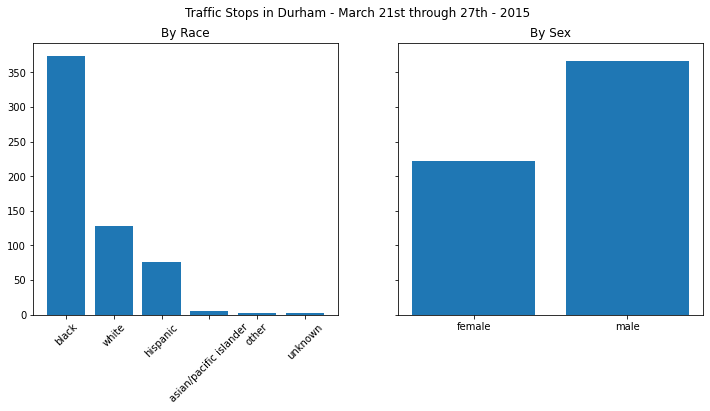

In [12]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Traffic Stops in Durham - March 21st through 27th - 2015")


axes[0].set_title("By Race")
axes[0].bar(race_counts.keys(), race_counts.values())
axes[0].tick_params(axis='x', labelrotation = 45)

axes[1].set_title("By Sex")
axes[1].bar(sex_counts.keys(), sex_counts.values())